<a href="https://colab.research.google.com/github/svnmurali-2004/Docors-Patient-Conversations-Analysis/blob/main/infosysspringboardinternship_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import pandas as pd

In [4]:
df = pd.read_csv("/content/gpt-4datamodified.csv")
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [5]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.1 MB/s eta 0:00:00


In [6]:
pip install spacy transformers textblob textstat wordcloud matplotlib scikit-learn

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Conversation: This is a sample conversation for testing purposes.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


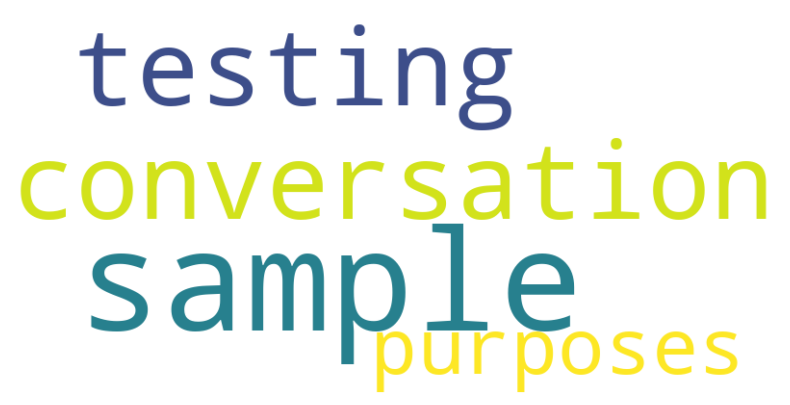

In [7]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textstat import flesch_kincaid_grade
import spacy
from transformers import pipeline
import pandas as pd

# Load NLP model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Load Sentiment Analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def detect_emotion(text):
    emotion_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    labels = ["joy", "anger", "sadness", "fear", "surprise"]
    return emotion_pipeline(text, candidate_labels=labels)

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

def readability_score(text):
    return flesch_kincaid_grade(text)

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def analyze_conversation_extended(text):
    # Sentiment Analysis
    sentiment = sentiment_pipeline(text)[0]

    # Attention Level
    attention_level = "High" if sentiment["score"] < 0.6 else "Low"

    # Perform NER
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Tone Detection
    tone = "Neutral"
    if sentiment["label"] == "NEGATIVE":
        tone = "Concerned"
    elif sentiment["label"] == "POSITIVE":
        tone = "Reassuring"

    # Emotion Detection
    emotions = detect_emotion(text)

    # Subjectivity and Polarity
    subjectivity = get_subjectivity(text)
    polarity = get_polarity(text)

    # Lexical Diversity
    lexical_div = lexical_diversity(text)

    # Readability Score
    readability = readability_score(text)

    # Word Cloud Visualization
    generate_word_cloud(text)

    return {
        "sentiment": sentiment,
        "attention_level": attention_level,
        "tone": tone,
        "entities": entities,
        "emotion": emotions,
        "subjectivity": subjectivity,
        "polarity": polarity,
        "lexical_diversity": lexical_div,
        "readability_score": readability,
    }

# Example conversation (assuming df is a pandas DataFrame with text data)
df = pd.DataFrame({"text": ["This is a sample conversation for testing purposes."]})
conversation = df.iloc[0, 0]  # Fetch first row
print("Conversation:", conversation)
analysis = analyze_conversation_extended(conversation)

print("\n## Conversation Analysis\n")
for key, value in analysis.items():
    print(f"**{key.capitalize()}**: {value}")


In [8]:
!pip install textstat
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [9]:
import gradio as gr
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Load pipelines for emotion and sentiment analysis
emotion_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sentiment_pipeline = pipeline("sentiment-analysis")

# Define colors for emotions
EMOTION_COLORS = {
    "joy": "#FFD700",
    "sadness": "#1E90FF",
    "anger": "#FF4500",
    "fear": "#8B008B",
    "surprise": "#32CD32",
    "neutral": "#A9A9A9"
}

# Generate emotion percentages
def detect_emotions(text):
    labels = ["joy", "sadness", "anger", "fear", "surprise"]
    result = emotion_pipeline(text, candidate_labels=labels, multi_label=True)
    emotions = {label: score for label, score in zip(result["labels"], result["scores"])}
    return emotions

# Create a colorful abstract art piece based on emotions
def generate_abstract_art(emotions):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis("off")

    # Generate random shapes and colors based on emotions
    for emotion, intensity in emotions.items():
        color = EMOTION_COLORS.get(emotion, "#FFFFFF")
        for _ in range(int(intensity * 50)):
            x, y = np.random.rand(2)
            size = intensity * np.random.rand() * 0.1
            shape = np.random.choice(["circle", "square"])
            if shape == "circle":
                circle = plt.Circle((x, y), size, color=color, alpha=0.7)
                ax.add_artist(circle)
            else:
                square = plt.Rectangle((x - size / 2, y - size / 2), size, size, color=color, alpha=0.7)
                ax.add_artist(square)

    # Save the artwork
    plt.savefig("abstract_art.png", dpi=300, bbox_inches="tight")
    plt.close()
    return "abstract_art.png"

# Generate a colorful emotion bar chart
def generate_emotion_chart(emotions):
    labels = list(emotions.keys())
    scores = list(emotions.values())
    colors = [EMOTION_COLORS.get(label, "#A9A9A9") for label in labels]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, scores, color=colors, alpha=0.8)
    plt.title("Emotion Analysis", fontsize=16)
    plt.ylabel("Intensity", fontsize=12)
    plt.xlabel("Emotions", fontsize=12)
    plt.savefig("emotion_chart.png", dpi=300, bbox_inches="tight")
    plt.close()
    return "emotion_chart.png"

# Main function for analysis and visualization
def analyze_conversation(text):
    emotions = detect_emotions(text)
    sentiment = sentiment_pipeline(text)[0]

    # Generate visuals
    art_path = generate_abstract_art(emotions)
    chart_path = generate_emotion_chart(emotions)

    return emotions, sentiment["label"], sentiment["score"], art_path, chart_path

# Gradio Interface
def gradio_interface(text):
    emotions, sentiment_label, sentiment_score, art_path, chart_path = analyze_conversation(text)

    return (
        emotions,  # Emotion Percentages
        sentiment_label,  # Sentiment Label
        round(sentiment_score, 2),  # Sentiment Score
        art_path,  # Abstract Art Image Path
        chart_path  # Emotion Bar Chart Path
    )

iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=5, placeholder="Enter your conversation or text here", label="Input Text"),
    outputs=[
        gr.JSON(label="Emotion Percentages"),
        gr.Textbox(label="Overall Sentiment"),
        gr.Textbox(label="Sentiment Score"),
        gr.Image(type="filepath", label="Abstract Emotion Art"),
        gr.Image(type="filepath", label="Emotion Bar Chart")
    ],
    title="Emotion-Driven Conversation Art Generator",
    description="Analyze emotions and sentiments of text and generate colorful visualizations, including abstract art and emotion charts."
)

iface.launch()




Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c00977705db67709d3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
